In [62]:
import nltk
from nltk.corpus import brown, treebank
from toolz import concat
from collections import Counter, defaultdict
from math import log2

----

## Problem 3. (15 pts)

For this problem, you will need to calculate some probabilities based on n-gram counts from the Brown corpus. First we'll read in the data:

In [63]:
def pad_sentences(sentences):
    return [ ['<s>', '<s>'] + s + ['</s>', '</s>'] for s in sentences ]
            

def count_ngrams(sentences, n):
    return Counter(concat(padded_ngrams(s, n)
                          for s in sentences))

## Unigram, bigram, and trigram counts

corpus = pad_sentences(brown.sents())
count_unigrams = Counter(concat(corpus))
count_bigrams = Counter(concat(nltk.bigrams(sentence) for sentence in corpus))
count_trigrams = Counter(concat(nltk.trigrams(sentence) for sentence in corpus))

## Vocabulary size
V = len(count_unigrams)

## Number of tokens in the corpus
N = sum(count_unigrams.values())

In [34]:
count_unigrams.most_common(5)

[('<s>', 114680), ('</s>', 114680), ('the', 62713), (',', 58334), ('.', 49346)]

In [35]:
count_bigrams.most_common(5)

[(('<s>', '<s>'), 57340),
 (('</s>', '</s>'), 57340),
 (('.', '</s>'), 49346),
 (('of', 'the'), 9625),
 (('<s>', 'The'), 6544)]

In [36]:
count_trigrams.most_common(5)

[(('.', '</s>', '</s>'), 49346),
 (('<s>', '<s>', 'The'), 6544),
 (('<s>', '<s>', '``'), 4168),
 (("''", '.', '</s>'), 3331),
 (('<s>', '<s>', 'He'), 2859)]

Using these counts, compute each of the following probabilities, showing all your work. Give *both* the MLE and the Laplace (i.e., Add-1) values using the formulas in section 3.5 of Juafsky and Martin.

P(the)

<div class="alert alert-block alert-info">
Write your answer in the cell below ↴
</div>

In [64]:
#MLE
print((count_unigrams['the'])/N)

#Laplace
print((count_unigrams['the'] + 1)/(N + V))


0.04509935622687968
0.0433523594110649


P(of the)

<div class="alert alert-block alert-info">
Write your answer in the cell below ↴
</div>

In [157]:
#MLE
print((count_bigrams['of','the'])/N)

#Laplace
print((count_unigrams['of'] + 1)/(N+V) * (count_bigrams['of','the'] + 1)/(count_unigrams['of'] + V))


0.006921711665583164
0.0026057285141160118


P(the the)

<div class="alert alert-block alert-info">
Write your answer in the cell below ↴
</div>

In [160]:
#MLE
print((count_bigrams['the','the'])/N)

#Laplace
print((count_unigrams['the'] + 1)/(N+V) * (count_bigrams['the','the'] + 1)/(count_unigrams['the'] + V))


0.0
3.650048783472948e-07


P(the | of)

<div class="alert alert-block alert-info">
Write your answer in the cell below ↴
</div>

In [181]:
#MLE
print((count_bigrams['of','the']) / count_unigrams['of'])

#Laplace
print(((count_bigrams['of','the']) + 1) /(count_unigrams['of'] + V))


0.26676829268292684
0.10447259032548649


P(the United States)

<div class="alert alert-block alert-info">
Write your answer in the cell below ↴
</div>

In [180]:
#MLE
step_1 = count_unigrams['the']/N
step_2 = count_bigrams['the','United']/count_unigrams['the']
step_3 = count_trigrams['the','United','States']/count_bigrams['the','United']
mle = step_1 * step_2 * step_3
print(mle)

#Laplace
step_1 = (count_unigrams['the']+1)/(N+V)
step_2 = (count_bigrams['the','United'] + 1) / (count_unigrams['the'] + V)
step_3 = (count_trigrams['the','United','States'] + 1) / (count_bigrams['the','United'])
laplace = step_1 * step_2 * step_3
print(laplace)


0.00023012443979081686
0.00011747984553758185


P(States | the United)

<div class="alert alert-block alert-info">
Write your answer in the cell below ↴
</div>

In [179]:
#MLE
print((count_bigrams['the','United']/count_unigrams['States']))

#Laplace
print((count_trigrams['the','United','States'] + 1) / (count_bigrams['the','United']))


0.8404494382022472
0.8582887700534759


-----

## Problem 4. (25 pts)

The following is an example of a weighted FSA:

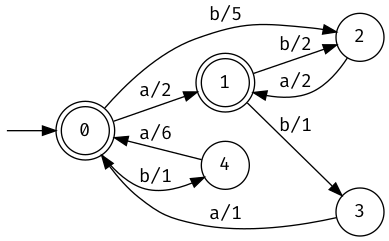

Each transition is labeled with an input symbol and a weight.  The **cost** of a path is the **sum** of the weights of each transition in the path.  For example, the state sequence 0 → 1 → 2 → 1, corresponding to the input sequence *aba*, would have the cost 2+2+2=6.


Applying the Viterbi algorithm by hand, find the cheapest (i.e., lowest summed weights) state sequence in this machine for the input sequence *ababa*.  Include the complete trellis with your answer.

<div class="alert alert-block alert-info">
Write your answer in the cell below ↴
</div>

In [ ]:
"""

Shortest Path:
[0] -- a/2 --> [1] -- b/2 --> [2] -- a/2 --> [1] -- b/1 --> [3] -- a/1 --> [0]
Length of 8

"""

----

## Problem 5. (30 pts)

For this problem, write a program to:

1. Construct a bigram language model from a training corpus using Add-*k* smoothing
2. Compute the perplexity of your model on a test corpus
3. Compare the perplexity of models with *k*=1.0, *k*=0.5, and *k*=0.1

Some details: 

1. To keep things simple, you can treat the corpus as a continuous sequence of words rather than sentences. That means you don't need to add `<s>` and `</s>` symbols. 
2. Use Laplace smoothing when you compute probabilities (the formulas are in chapter 3 of Jurafsky and Martin)
3. Remeber what happens when you multiply too many small numbers together! Use logs!
4. Take the `brown` corpus as your training sample and the `treebank` corpus as your test sample.

For reference, my implementation gives a perplexity of about 14250 for *k*=1.0, though your value may be slightly different:

```
In [27]:  laplace = BigramLM(train_corpus, 1.0)
In [28]:  laplace.perplexity(test_corpus) 
Out [28]: 14250.027272134404

```

In [70]:
train_corpus = brown.words()
test_corpus = treebank.words()

<div class="alert alert-block alert-info">
Write your answer in the cell below ↴
</div>

In [177]:
class BigramLM():
    def __init__(self,train_corpus,k):
        self.train_corpus = train_corpus
        self.k = k
        self.bigrams = nltk.FreqDist(nltk.bigrams(self.train_corpus))
        self.unigrams = Counter() 
        
        for (word1, word2), unigram in self.bigrams.items():
            self.unigrams[word1] += unigram
    
    def perplexity (self,test_corpus):
        PP = 0
        self.V = len(self.unigrams)
        self.N = len(test_corpus)
        
        for i in range (1, self.N):
            word1 = test_corpus[i]
            word2 = test_corpus[i-1]
            try:
                prob = (self.bigrams[(word2,word1)] + self.k) / (self.unigrams[word2]+(self.k*self.V))
                prob_log2 = log2(prob)
                PP += prob_log2
            except zeroDivisionErorr:
                prob = 0
        PP = (1/self.N) * PP * -1.0
        PP = 2**PP
        return PP

In [178]:
laplace = BigramLM(train_corpus,1.0)
laplace.perplexity(test_corpus)

14250.022132914324

In [175]:
laplace = BigramLM(train_corpus,0.5)
laplace.perplexity(test_corpus)

11768.322409410715

In [174]:
laplace = BigramLM(train_corpus,0.1)
laplace.perplexity(test_corpus)

8236.156510526092